# Pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" width="300px">

```python
import pandas as pd
````

> Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

From https://pandas.pydata.org/.

Let's first install Pandas and download some real patient data using the Python [Requests](https://docs.python-requests.org/) library.

In [1]:
%pip install --quiet requests
import requests
table_path = 'IXI.xls'
url = 'http://biomedic.doc.ic.ac.uk/brain-development/downloads/IXI/IXI.xls'
request = requests.get(url)
with open(table_path, 'wb') as f:
    f.write(request.content)

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --quiet pandas xlrd  # install pandas to read CSV files and xlrd to read old Excel files
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [3]:
data_frame = pd.read_excel(table_path)
data_frame.head()

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
0,1,1,170,80,2,3,5,2,1968-02-22,0,NaT,NaN
1,2,2,164,58,1,4,1,5,1970-01-30,1,2005-11-18,35.800137
2,12,1,175,70,1,2,1,5,1966-08-20,1,2005-06-01,38.781656
3,13,1,182,70,1,2,1,5,1958-09-15,1,2005-06-01,46.710472
4,14,2,163,65,1,4,1,5,1971-03-15,1,2005-06-09,34.236824


In [4]:
len(data_frame)

619

In [5]:
data_frame.describe()

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DATE_AVAILABLE,AGE
count,619.000000,619.000000,619.000000,619.000000,619.000000,619.000000,619.00000,619.000000,619.000000,590.000000
mean,335.399031,1.552504,160.466882,70.195477,1.374798,2.016155,2.50727,3.733441,0.957997,49.416235
std,185.351230,0.497638,99.604071,56.802863,1.122762,1.280826,2.05535,1.662949,0.200759,16.715313
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,19.980835
25%,176.500000,1.000000,160.000000,60.000000,1.000000,1.000000,1.00000,3.000000,1.000000,34.000000
50%,341.000000,2.000000,168.000000,70.000000,1.000000,2.000000,1.00000,5.000000,1.000000,50.611910
75%,498.000000,2.000000,176.000000,80.000000,1.000000,3.000000,5.00000,5.000000,1.000000,63.355921
max,662.000000,2.000000,1850.000000,960.000000,6.000000,5.000000,8.00000,5.000000,1.000000,86.318960


In [6]:
data_frame = data_frame[data_frame.HEIGHT < 300]
data_frame = data_frame[data_frame.WEIGHT < 300]
data_frame = data_frame[data_frame.WEIGHT > 0]
data_frame = data_frame[data_frame.HEIGHT > 0]
data_frame.describe()

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DATE_AVAILABLE,AGE
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,529.000000
mean,329.797101,1.552536,169.673913,72.822464,1.476449,2.106884,2.603261,3.967391,0.963768,48.337589
std,187.933809,0.497683,10.287457,14.807942,1.128491,1.196406,2.012716,1.421518,0.187036,16.247347
min,1.000000,1.000000,110.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.071184
25%,166.750000,1.000000,163.000000,61.000000,1.000000,1.000000,1.000000,3.000000,1.000000,33.686516
50%,326.500000,2.000000,170.000000,70.000000,1.000000,2.000000,1.000000,5.000000,1.000000,48.254620
75%,490.500000,2.000000,177.000000,81.250000,1.000000,3.000000,5.000000,5.000000,1.000000,61.995893
max,662.000000,2.000000,210.000000,127.000000,6.000000,5.000000,8.000000,5.000000,1.000000,86.198494


In [7]:
ethnicity_df = pd.read_excel(table_path, sheet_name='Ethnicity')
ethnicity_df

,ID,ETHNIC
0,1,White
1,4,Black or Black British
2,3,Asian or Asian British
3,5,Chinese
4,6,Other


In [8]:
mapping = pd.Series(ethnicity_df.ETHNIC.values, index=ethnicity_df.ID).to_dict()
mapping

{1: 'White',
 4: 'Black or Black British',
 3: 'Asian or Asian British',
 5: 'Chinese',
 6: 'Other'}

In [9]:
data_frame['ETHNIC_ID'] = data_frame['ETHNIC_ID'].map(mapping)
data_frame.head()

,IXI_ID,"SEX_ID (1=m, 2=f)",HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
0,1,1,170,80,NaN,3,5,2,1968-02-22,0,NaT,NaN
1,2,2,164,58,White,4,1,5,1970-01-30,1,2005-11-18,35.800137
2,12,1,175,70,White,2,1,5,1966-08-20,1,2005-06-01,38.781656
3,13,1,182,70,White,2,1,5,1958-09-15,1,2005-06-01,46.710472
4,14,2,163,65,White,4,1,5,1971-03-15,1,2005-06-09,34.236824


In [10]:
data_frame.columns

Index(['IXI_ID', 'SEX_ID (1=m, 2=f)', 'HEIGHT', 'WEIGHT', 'ETHNIC_ID',
       'MARITAL_ID', 'OCCUPATION_ID', 'QUALIFICATION_ID', 'DOB',
       'DATE_AVAILABLE', 'STUDY_DATE', 'AGE'],
      dtype='object')

In [11]:
data_frame.rename(columns={'SEX_ID (1=m, 2=f)': 'Sex'}, inplace=True)
sex_mapping = {1: 'Male', 2: 'Female'}
data_frame['Sex'] = data_frame['Sex'].map(sex_mapping)
data_frame.head()

,IXI_ID,Sex,HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
0,1,Male,170,80,NaN,3,5,2,1968-02-22,0,NaT,NaN
1,2,Female,164,58,White,4,1,5,1970-01-30,1,2005-11-18,35.800137
2,12,Male,175,70,White,2,1,5,1966-08-20,1,2005-06-01,38.781656
3,13,Male,182,70,White,2,1,5,1958-09-15,1,2005-06-01,46.710472
4,14,Female,163,65,White,4,1,5,1971-03-15,1,2005-06-09,34.236824


In [12]:
data_frame = data_frame.dropna()
data_frame.head()

,IXI_ID,Sex,HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
1,2,Female,164,58,White,4,1,5,1970-01-30,1,2005-11-18,35.800137
2,12,Male,175,70,White,2,1,5,1966-08-20,1,2005-06-01,38.781656
3,13,Male,182,70,White,2,1,5,1958-09-15,1,2005-06-01,46.710472
4,14,Female,163,65,White,4,1,5,1971-03-15,1,2005-06-09,34.236824
6,16,Male,172,63,White,2,1,5,1950-04-24,1,2005-06-24,55.167693


In [13]:
males_mask = data_frame.Sex == 'Male'
females_mask = data_frame['Sex'] == 'Female'

In [14]:
males_df = data_frame[males_mask]
males_df.describe()

,IXI_ID,HEIGHT,WEIGHT,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DATE_AVAILABLE,AGE
count,227.00000,227.000000,227.000000,227.000000,227.000000,227.000000,227.0,227.000000
mean,338.15859,177.290749,79.850220,1.929515,2.414097,4.237885,1.0,46.566126
std,207.94841,7.909558,13.159825,0.942770,1.992325,1.210489,0.0,16.273230
min,12.00000,152.000000,54.000000,0.000000,0.000000,0.000000,1.0,20.071184
25%,145.50000,172.000000,70.000000,1.000000,1.000000,4.000000,1.0,32.887064
50%,317.00000,177.000000,78.000000,2.000000,1.000000,5.000000,1.0,45.032170
75%,532.50000,183.000000,89.000000,2.000000,5.000000,5.000000,1.0,60.689938
max,662.00000,210.000000,123.000000,5.000000,8.000000,5.000000,1.0,86.198494


In [15]:
females_df = data_frame[females_mask]
females_df.describe()

,IXI_ID,HEIGHT,WEIGHT,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DATE_AVAILABLE,AGE
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.0,285.000000
mean,315.329825,163.554386,66.957895,2.280702,2.778947,3.838596,1.0,50.103313
std,168.402216,7.333218,13.564335,1.291282,2.016720,1.459036,0.0,16.038312
min,2.000000,110.000000,45.000000,0.000000,0.000000,0.000000,1.0,20.698152
25%,173.000000,159.000000,58.000000,1.000000,1.000000,3.000000,1.0,35.991786
50%,321.000000,164.000000,64.000000,2.000000,2.000000,4.000000,1.0,53.535934
75%,452.000000,168.000000,72.000000,3.000000,5.000000,5.000000,1.0,62.505133
max,646.000000,185.000000,127.000000,5.000000,8.000000,5.000000,1.0,81.941136


In [16]:
data_frame.groupby('ETHNIC_ID').HEIGHT.describe()

,count,mean,std,min,25%,50%,75%,max
ETHNIC_ID,,,,,,,,
Asian or Asian British,49.0,169.081633,8.536287,150.0,163.00,170.0,175.00,185.0
Black or Black British,14.0,168.642857,11.907381,150.0,163.00,165.0,176.00,195.0
Chinese,14.0,167.000000,11.766968,143.0,159.25,165.0,173.75,185.0
Other,10.0,165.400000,4.005552,160.0,163.25,164.5,167.50,173.0
White,425.0,169.929412,10.373438,110.0,163.00,170.0,177.00,210.0


In [23]:
data_frame.query('Sex == "Male"')  # or data_frame[data_frame.Sex == 'Male']

,IXI_ID,Sex,HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
2,12,Male,175,70,White,2,1,5,1966-08-20,1,2005-06-01,38.781656
3,13,Male,182,70,White,2,1,5,1958-09-15,1,2005-06-01,46.710472
6,16,Male,172,63,White,2,1,5,1950-04-24,1,2005-06-24,55.167693
8,19,Male,180,88,White,2,1,4,1946-11-02,1,2005-06-30,58.658453
9,20,Male,178,72,White,2,1,4,1966-01-05,1,2005-06-24,39.466119
...,...,...,...,...,...,...,...,...,...,...,...,...
611,648,Male,193,120,White,1,6,4,1959-03-08,1,2006-11-27,47.723477
613,651,Male,175,61,Asian or Asian British,2,8,2,1956-07-09,1,2006-12-01,50.395619
614,652,Male,163,80,White,1,1,5,1963-12-05,1,2006-12-01,42.989733
615,653,Male,172,100,White,3,1,5,1960-09-14,1,2006-12-04,46.220397


In [30]:
data_frame.query(
    'Sex == "Male"'
    ' and ETHNIC_ID == "White"'
    ' and AGE > 40'
    ' and AGE < 60'
    ' and QUALIFICATION_ID == 5'
    ' and HEIGHT > 180'
    ' and WEIGHT < 90'
    ' and MARITAL_ID == 2'
)

,IXI_ID,Sex,HEIGHT,WEIGHT,ETHNIC_ID,MARITAL_ID,OCCUPATION_ID,QUALIFICATION_ID,DOB,DATE_AVAILABLE,STUDY_DATE,AGE
3,13,Male,182,70,White,2,1,5,1958-09-15,1,2005-06-01,46.710472
360,394,Male,184,80,White,2,1,5,1952-08-07,1,2006-05-08,53.749487
563,592,Male,181,65,White,2,1,5,1958-10-01,1,2006-10-30,48.079398


In [17]:
%pip install --quiet seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'

Note: you may need to restart the kernel to use updated packages.


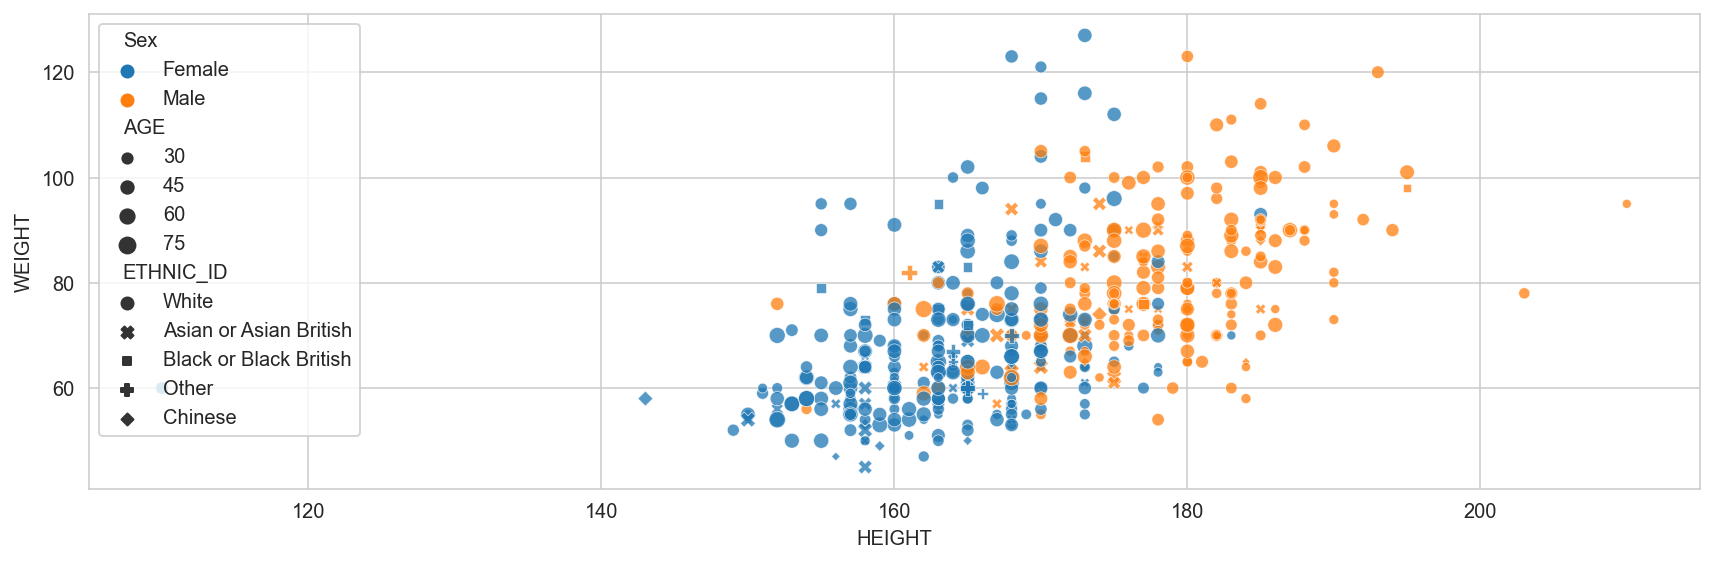

In [31]:
_, ax = plt.subplots(figsize=(12, 4))
sns.scatterplot(
    x='HEIGHT',
    y='WEIGHT',
    size='AGE',
    style='ETHNIC_ID',
    data=data_frame,
    hue='Sex',
    ax=ax,
    alpha=0.75,
)
plt.tight_layout()